<h1>Taller Machine Learning para economistas</h1>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importamos el CSV

In [32]:
data = pd.read_csv("https://raw.githubusercontent.com/SoyJuanDuenas/UNAL/master/ML_para_economistas/AirIndia%20(International).csv")
pd.set_option('display.max_columns', None)
data.head()

,Month,DEPARTURES\n,HOURS\n,KILOMETRE\n(TH),PASSENGERS CARRIED\n,PASSENGER KMS.PERFORMED\n(TH),AVAILABLE SEAT KILOMETRE\n(TH),PAX.LOAD FACTOR (IN %),FY
0,APR,2727.0,12989.0,9552.0,394072.0,1705993.0,2361391.0,72.2,FY14
1,MAY,2733.0,13053.0,9868.0,415697.0,1841507.0,2439514.0,75.5,FY14
2,JUNE,2777.0,13339.0,9744.0,420919.0,1848800.0,2408821.0,76.8,FY14
3,JULY,2813.0,13430.0,9916.0,372662.0,1734592.0,2451380.0,70.8,FY14
4,AUG,2844.0,13731.0,10037.0,424706.0,1983795.0,2481327.0,79.9,FY14


Modificamos el nombre de las columnas

In [19]:
data.columns = ["month","departures", "hours", "km", "passenger_carried", "passenger_kms_performed",
                "available_seat","pax_load_factor","fy"]
data.head()

,month,departures,hours,km,passenger_carried,passenger_kms_performed,available_seat,pax_load_factor,fy
0,APR,2727.0,12989.0,9552.0,394072.0,1705993.0,2361391.0,72.2,FY14
1,MAY,2733.0,13053.0,9868.0,415697.0,1841507.0,2439514.0,75.5,FY14
2,JUNE,2777.0,13339.0,9744.0,420919.0,1848800.0,2408821.0,76.8,FY14
3,JULY,2813.0,13430.0,9916.0,372662.0,1734592.0,2451380.0,70.8,FY14
4,AUG,2844.0,13731.0,10037.0,424706.0,1983795.0,2481327.0,79.9,FY14


<h2>caracterización</h2>

En este dataframe tenemos datos de una aerolinea (AirIndia) durante los diferentes meses, contiene datos cuantitativos y puede ser usada para estimar el performance y la eficiencia de la aerolinea durante los diferentes cortes de tiempo

Las variables son las siguientes:

month: Esta columna se refiere al mes en el que se registraron los datos.

departures: El número de vuelos que salieron durante el mes en cuestión.

hours: Horas voladas por la aerolínea durante el mes en cuestión. Esto se puede utilizar para hacer un seguimiento de la utilización de la flota de la aerolínea.

km: Kilómetros volados por la aerolínea durante el mes, medidos en miles. Esto se puede utilizar para hacer un seguimiento del rendimiento operativo general de la aerolínea.

passenger_carried: Número de pasajeros transportados por la aerolínea durante un mes determinado.

passenger_kms_performed: Kilómetros de pasajero realizados por la aerolínea durante el mes, medidos en miles. Esto se puede utilizar para hacer un seguimiento del rendimiento de ingresos de la aerolínea.

available_seat: Kilómetros de asiento disponibles en los vuelos de la aerolínea durante el mes, medidos en miles. Esto se puede utilizar para hacer un seguimiento de la utilización de capacidad de la aerolínea.

pax_load_factor: Porcentaje de asientos disponibles que fueron ocupados realmente por pasajeros durante el mes en cuestión. Esta es una métrica clave para las aerolíneas, ya que indica qué tan eficazmente están llenando sus aviones.

<h2>¿Para qué un modelo de machine learning</h2>

Nos seria útil correr modelos de machine learning con varios objetivos, clusterizar los diferentes meses según su comportamiento con el fin de poder planificar financieramente el flujo de caja, o por otro lado podemos usar modelos de predicción con el fin de obtener un estimado de cual es la capacidad que se debe suplir y por ende hacer una oferta adecuada para cada uno de los meses en sus tendencias




In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    120 non-null    object 
 1   departures               119 non-null    float64
 2   hours                    119 non-null    float64
 3   km                       119 non-null    float64
 4   passenger_carried        119 non-null    float64
 5   passenger_kms_performed  119 non-null    float64
 6   available_seat           119 non-null    float64
 7   pax_load_factor          120 non-null    object 
 8   fy                       120 non-null    object 
dtypes: float64(6), object(3)
memory usage: 8.6+ KB


In [21]:
data.isnull().sum()


month                      0
departures                 1
hours                      1
km                         1
passenger_carried          1
passenger_kms_performed    1
available_seat             1
pax_load_factor            0
fy                         0
dtype: int64

In [22]:
data = data.dropna()

Tenemos una base de datos con un buen comportamiento a la cual no es necesario hacerle ninguna clase de modificación o estimar valores nulos, casi que en su totalidad los datos son de tipo numerico lo cual facilita trabajar con metodologias cuantitativas.

Sin embargo debido a la pandemia tenemos un mes con datos igual a 0, pero como es un dato relacionado con el tiempo no lo podemos eliminar.

Se le realizo un cambio de nombres a las columnas debido a facilidad de trabajo, además se eliminará la última columna del dataset dado que no nos provee de información relevante para el análisis. a su vez la última fila del dataset dado que tiene datos incompletos

In [23]:
data = data.drop("fy", axis=1)
data.head()

,month,departures,hours,km,passenger_carried,passenger_kms_performed,available_seat,pax_load_factor
0,APR,2727.0,12989.0,9552.0,394072.0,1705993.0,2361391.0,72.2
1,MAY,2733.0,13053.0,9868.0,415697.0,1841507.0,2439514.0,75.5
2,JUNE,2777.0,13339.0,9744.0,420919.0,1848800.0,2408821.0,76.8
3,JULY,2813.0,13430.0,9916.0,372662.0,1734592.0,2451380.0,70.8
4,AUG,2844.0,13731.0,10037.0,424706.0,1983795.0,2481327.0,79.9


Corremos una matriz de correlación, para esto debemos primero tener seleccionadas unicamente las variables numericas

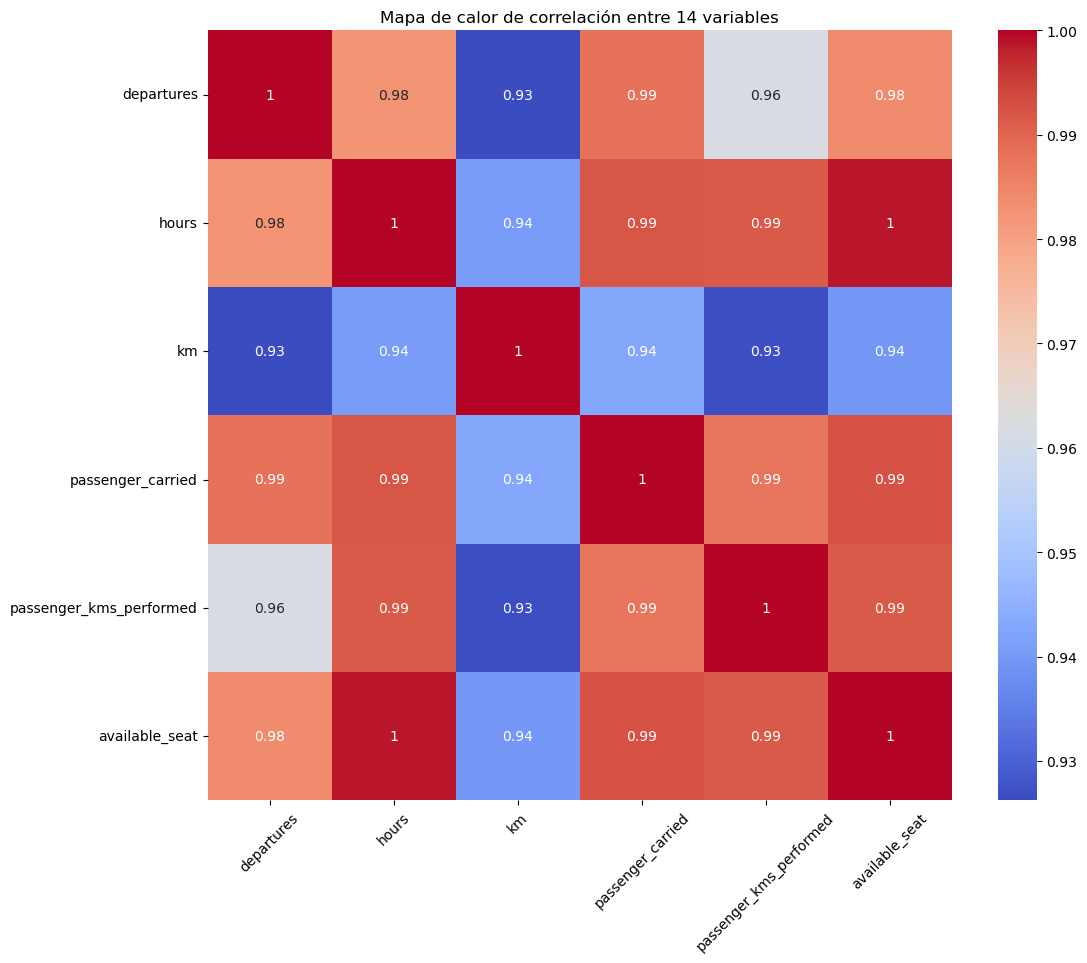

In [24]:
data_num = data.drop("month", axis=1)

correlation_matrix = data_num.corr()
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Crear el heatmap
plt.title('Mapa de calor de correlación entre 14 variables')  # Título del gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.yticks(rotation=0)  # Rotar etiquetas del eje y para mayor legibilidad
plt.show()  # Mostrar el mapa de cal

Vemos altas correlaciones en casi todos los datos debido a que los datos entre si tienen relación ej el numero de pasajeros y la cantidad de viajes.

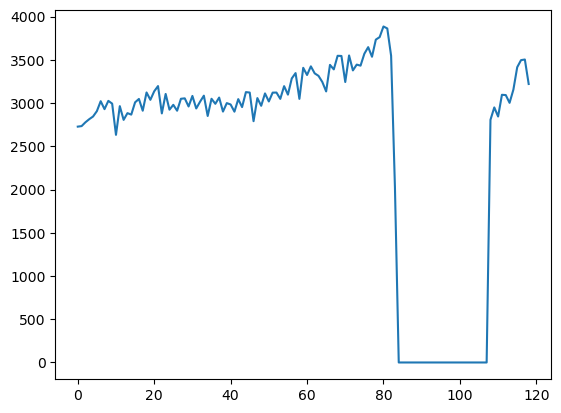

In [28]:
plt.plot(data["departures"])

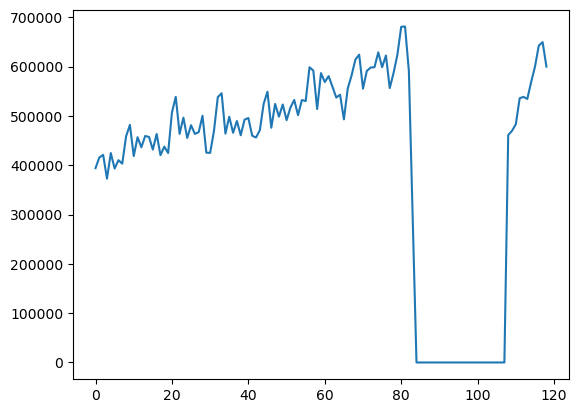

In [29]:
plt.plot(data["passenger_carried"])

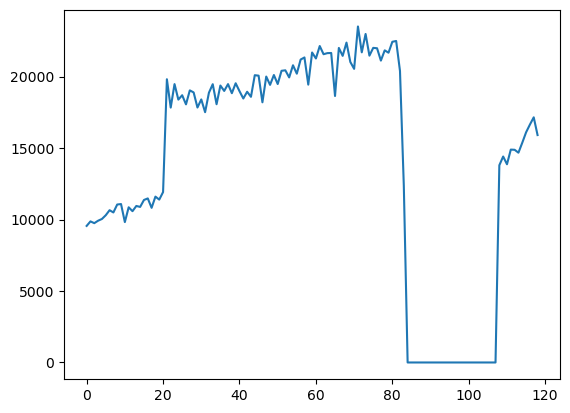

In [30]:
plt.plot(data["km"])

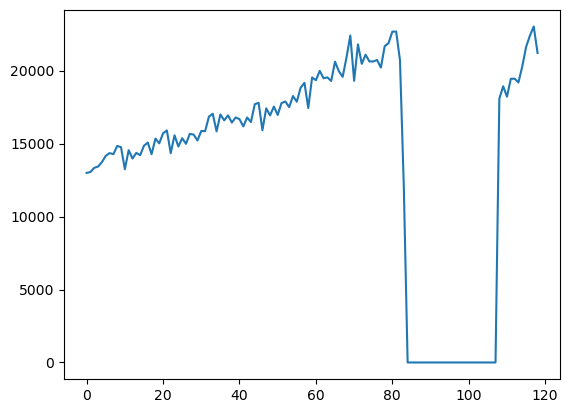

In [31]:
plt.plot(data["hours"])

Podemos hacer un modelo de machine learning para pronosticar cuanto habria sido la cantidad de viajes, los Km realizados entre otros en caso de que no hubieramos la pandemia, probablemente la mejor metodologia es usar metodos de pronostrico que tengan en cuenta la tendencia, dado que los datos que tenemos tienen una tendencia definida y no son estocasticos, es muy probable que el modelo de como resultado la continuación de la tendencia con determinado intervalo de confianza.